In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report
from sklearn.linear_model import LogisticRegression

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Univariate Analysis

In [4]:
df_setosa=data.loc[data['species']=='setosa']
df_virginica=data.loc[data['species']=='virginica']
df_versicolor=data.loc[data['species']=='versicolor']

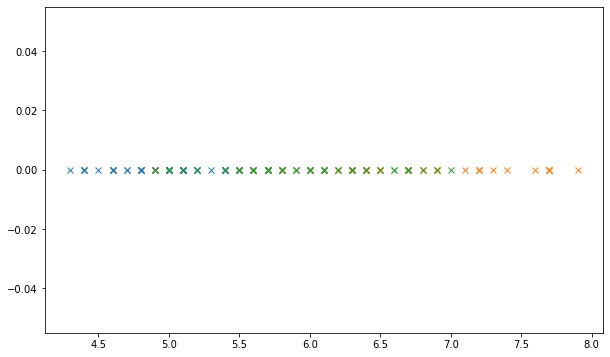

In [5]:
plt.figure(figsize = (10,6))
plt.plot(df_setosa['sepal_length'], np.zeros_like(df_setosa['sepal_length']), 'x')
plt.plot(df_virginica['sepal_length'], np.zeros_like(df_virginica['sepal_length']), 'x')
plt.plot(df_versicolor['sepal_length'], np.zeros_like(df_versicolor['sepal_length']), 'x')
plt.show()

# Bivariate Analysis


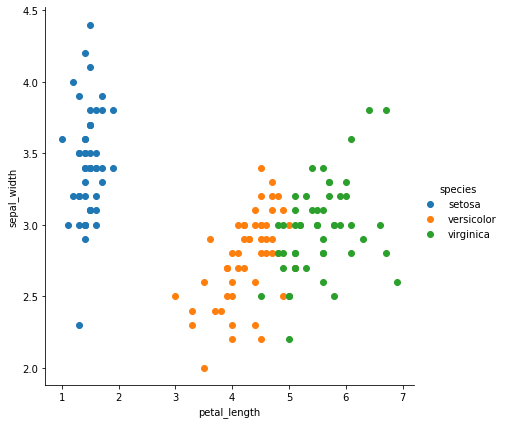

In [6]:
sns.FacetGrid(data, hue = 'species', size = 6).map(plt.scatter,"petal_length",'sepal_width').add_legend()
plt.show()

# Multivariate Analysis

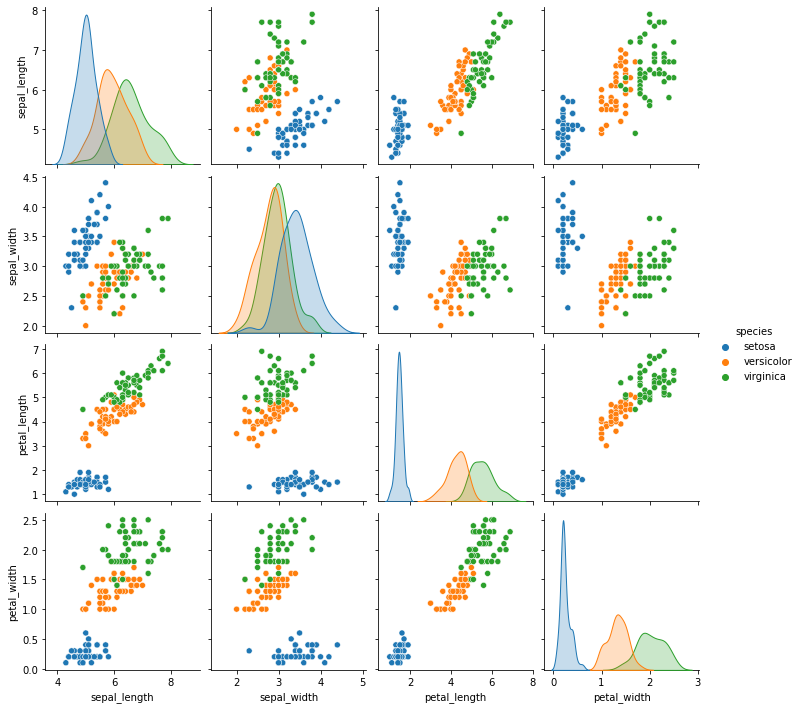

In [7]:
sns.pairplot(data, hue = 'species')

In [8]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,shuffle=True,random_state=0)

In [6]:
x_train.shape,y_train.shape

((105, 4), (105,))

In [7]:
#Logistic Regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [9]:
y_train_pred = classifier.predict(x_train)
y_train_pred

array(['versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versico

In [18]:
ac(y_train, y_train_pred)

0.9809523809523809

In [10]:
y_test_pred=classifier.predict(x_test)

In [21]:
ac(y_test,y_test_pred)

0.9777777777777777

In [22]:
classifier.intercept_

array([  8.99776952,   1.54261976, -10.54038928])

In [23]:
classifier.coef_

array([[-0.39777783,  0.83425933, -2.28938237, -0.9783523 ],
       [ 0.54464555, -0.29058549, -0.23251808, -0.65856189],
       [-0.14686772, -0.54367385,  2.52190044,  1.63691419]])

In [24]:
set(y_train)

{'setosa', 'versicolor', 'virginica'}

In [19]:
cm(y_train, y_train_pred)

array([[34,  0,  0],
       [ 0, 30,  2],
       [ 0,  0, 39]], dtype=int64)

In [29]:
print(report(y_train,y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      0.94      0.97        32
   virginica       0.95      1.00      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [28]:
print(report(y_test,y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# ROC curve

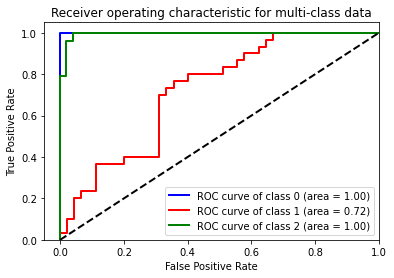

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

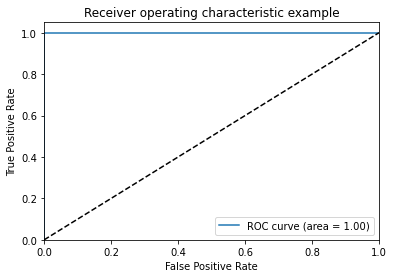

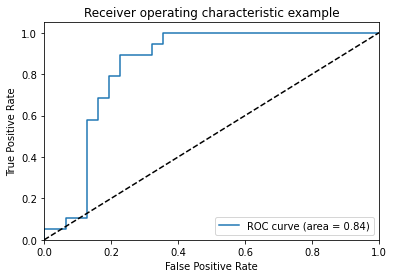

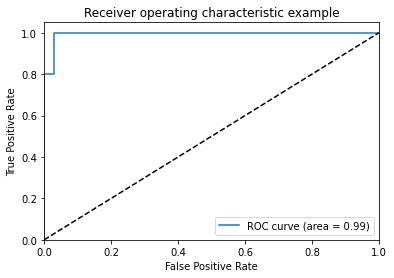

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()